# Importing Libraries

In [1]:
import hedgehog as h
from IPython.display import Image
import pandas as pd

# 1 Defining BN

In [2]:
bn = h.BayesNet((['Development','Cost','Resources'],'Quality'),
                (["Technology","ZPersonality","Collaboration","Team size"],'Resources'),
                (['Development','Resources'],'Cost'),(['Resources','Technology'],'Development'))
bn.nodes

['Collaboration',
 'Technology',
 'Team size',
 'ZPersonality',
 'Resources',
 'Development',
 'Cost',
 'Quality']

In [3]:
bn.parents

{'Quality': ['Cost', 'Development', 'Resources'],
 'Resources': ['Collaboration', 'Team size', 'Technology', 'ZPersonality'],
 'Cost': ['Development', 'Resources'],
 'Development': ['Resources', 'Technology']}

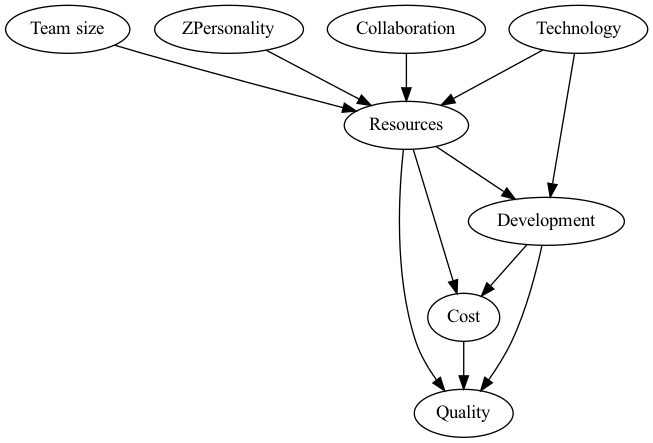

In [4]:
viz = bn.graphviz()
Image('' + viz.render('Basic', format='png'))


## Initializing CPTs

In [5]:
#P(Collaboration)
bn.P['Collaboration'] = pd.Series({'High':.7,'Medium':0.2,'Low':0.1})
bn.P['Collaboration']

High      0.7
Medium    0.2
Low       0.1
dtype: float64

In [6]:
#P(Personality)
bn.P['ZPersonality'] = pd.Series({'Helping':0.99,'Not Helping':.01})
bn.P['ZPersonality']

Helping        0.99
Not Helping    0.01
dtype: float64

In [7]:
#P(Technology)
bn.P['Technology'] = pd.Series({'High':.5,'Medium':0.3,'Low':0.2})
bn.P['Technology']

High      0.5
Medium    0.3
Low       0.2
dtype: float64

In [8]:
#P(Team Size)
bn.P['Team size'] = pd.Series({'High':.7,'Medium':0.3,'Low':0})
bn.P['Team size']

High      0.7
Medium    0.3
Low       0.0
dtype: float64

In [9]:
#P(Resources | Collaboration, Team size, Technology, ZPersonality)
bn.P['Resources'] = pd.Series({
    ('High', 'High', 'High', 'Helping', 'High'): 0.33,
    ('High', 'High', 'High', 'Not Helping', 'High'): 0.33,
    ('High', 'High', 'High', 'Helping', 'Medium'):0.33,
    ('High', 'High', 'High', 'Not Helping', 'Medium'):0.33,
    ('High', 'High', 'High', 'Helping', 'Low'):0.33,
    ('High', 'High', 'High', 'Not Helping', 'Low'):0.33,
    ('High', 'High', 'Medium', 'Helping', 'High'):0.33,
    ('High', 'High', 'Medium', 'Not Helping', 'High'):0.33,
    ('High', 'High', 'Medium' , 'Helping', 'Medium'):0.33,
    ('High', 'High', 'Medium', 'Not Helping', 'Medium'):0.33,
    ('High', 'High', 'Medium', 'Helping', 'Low'):0.33,
    ('High', 'High', 'Medium', 'Not Helping', 'Low'):0.33,
    ('High', 'High', 'Low', 'Helping', 'High'):0.33,
    ('High', 'High', 'Low', 'Not Helping', 'High'):0.33,
    ('High', 'High', 'Low', 'Helping', 'Medium'):0.33,
    ('High', 'High', 'Low', 'Not Helping', 'Medium'):0.33,
    ('High', 'High', 'Low', 'Helping', 'Low'):0.33,
    ('High', 'High', 'Low', 'Not Helping', 'Low'):0.33,
    
    ('High', 'Medium', 'High', 'Helping', 'High'): 0.33,
    ('High', 'Medium', 'High', 'Not Helping', 'High'): 0.33,
    ('High', 'Medium', 'High', 'Helping', 'Medium'):0.33,
    ('High', 'Medium', 'High', 'Not Helping', 'Medium'):0.33,
    ('High', 'Medium', 'High', 'Helping', 'Low'):0.33,
    ('High', 'Medium', 'High', 'Not Helping', 'Low'):0.33,
    ('High', 'Medium', 'Medium', 'Helping', 'High'):0.33,
    ('High', 'Medium', 'Medium', 'Not Helping', 'High'):0.33,
    ('High', 'Medium', 'Medium' , 'Helping', 'Medium'):0.33,
    ('High', 'Medium', 'Medium', 'Not Helping', 'Medium'):0.33,
    ('High', 'Medium', 'Medium', 'Helping', 'Low'):0.33,
    ('High', 'Medium', 'Medium', 'Not Helping', 'Low'):0.33,
    ('High', 'Medium', 'Low', 'Helping', 'High'):0.33,
    ('High', 'Medium', 'Low', 'Not Helping', 'High'):0.33,
    ('High', 'Medium', 'Low', 'Helping', 'Medium'):0.33,
    ('High', 'Medium', 'Low', 'Not Helping', 'Medium'):0.33,
    ('High', 'Medium', 'Low', 'Helping', 'Low'):0.33,
    ('High', 'Medium', 'Low', 'Not Helping', 'Low'):0.33,
    
    ('High', 'Low', 'High', 'Helping', 'High'): 0.33,
    ('High', 'Low', 'High', 'Not Helping', 'High'): 0.33,
    ('High', 'Low', 'High', 'Helping', 'Medium'):0.33,
    ('High', 'Low', 'High', 'Not Helping', 'Medium'):0.33,
    ('High', 'Low', 'High', 'Helping', 'Low'):0.33,
    ('High', 'Low', 'High', 'Not Helping', 'Low'):0.33,
    ('High', 'Low', 'Medium', 'Helping', 'High'):0.33,
    ('High', 'Low', 'Medium', 'Not Helping', 'High'):0.33,
    ('High', 'Low', 'Medium' , 'Helping', 'Medium'):0.33,
    ('High', 'Low', 'Medium', 'Not Helping', 'Medium'):0.33,
    ('High', 'Low', 'Medium', 'Helping', 'Low'):0.33,
    ('High', 'Low', 'Medium', 'Not Helping', 'Low'):0.33,
    ('High', 'Low', 'Low', 'Helping', 'High'):0.33,
    ('High', 'Low', 'Low', 'Not Helping', 'High'):0.33,
    ('High', 'Low', 'Low', 'Helping', 'Medium'):0.33,
    ('High', 'Low', 'Low', 'Not Helping', 'Medium'):0.33,
    ('High', 'Low', 'Low', 'Helping', 'Low'):0.33,
    ('High', 'Low', 'Low', 'Not Helping', 'Low'):0.33,

    ('Medium', 'High', 'High', 'Helping', 'High'): 0.33,
    ('Medium', 'High', 'High', 'Not Helping', 'High'): 0.33,
    ('Medium', 'High', 'High', 'Helping', 'Medium'):0.33,
    ('Medium', 'High', 'High', 'Not Helping', 'Medium'):0.33,
    ('Medium', 'High', 'High', 'Helping', 'Low'):0.33,
    ('Medium', 'High', 'High', 'Not Helping', 'Low'):0.33,
    ('Medium', 'High', 'Medium', 'Helping', 'High'):0.33,
    ('Medium', 'High', 'Medium', 'Not Helping', 'High'):0.33,
    ('Medium', 'High', 'Medium' , 'Helping', 'Medium'):0.33,
    ('Medium', 'High', 'Medium', 'Not Helping', 'Medium'):0.33,
    ('Medium', 'High', 'Medium', 'Helping', 'Low'):0.33,
    ('Medium', 'High', 'Medium', 'Not Helping', 'Low'):0.33,
    ('Medium', 'High', 'Low', 'Helping', 'High'):0.33,
    ('Medium', 'High', 'Low', 'Not Helping', 'High'):0.33,
    ('Medium', 'High', 'Low', 'Helping', 'Medium'):0.33,
    ('Medium', 'High', 'Low', 'Not Helping', 'Medium'):0.33,
    ('Medium', 'High', 'Low', 'Helping', 'Low'):0.33,
    ('Medium', 'High', 'Low', 'Not Helping', 'Low'):0.33,
    
    ('Medium', 'Medium', 'High', 'Helping', 'High'): 0.33,
    ('Medium', 'Medium', 'High', 'Not Helping', 'High'): 0.33,
    ('Medium', 'Medium', 'High', 'Helping', 'Medium'):0.33,
    ('Medium', 'Medium', 'High', 'Not Helping', 'Medium'):0.33,
    ('Medium', 'Medium', 'High', 'Helping', 'Low'):0.33,
    ('Medium', 'Medium', 'High', 'Not Helping', 'Low'):0.33,
    ('Medium', 'Medium', 'Medium', 'Helping', 'High'):0.33,
    ('Medium', 'Medium', 'Medium', 'Not Helping', 'High'):0.33,
    ('Medium', 'Medium', 'Medium' , 'Helping', 'Medium'):0.33,
    ('Medium', 'Medium', 'Medium', 'Not Helping', 'Medium'):0.33,
    ('Medium', 'Medium', 'Medium', 'Helping', 'Low'):0.33,
    ('Medium', 'Medium', 'Medium', 'Not Helping', 'Low'):0.33,
    ('Medium', 'Medium', 'Low', 'Helping', 'High'):0.33,
    ('Medium', 'Medium', 'Low', 'Not Helping', 'High'):0.33,
    ('Medium', 'Medium', 'Low', 'Helping', 'Medium'):0.33,
    ('Medium', 'Medium', 'Low', 'Not Helping', 'Medium'):0.33,
    ('Medium', 'Medium', 'Low', 'Helping', 'Low'):0.33,
    ('Medium', 'Medium', 'Low', 'Not Helping', 'Low'):0.33,
    
    ('Medium', 'Low', 'High', 'Helping', 'High'): 0.33,
    ('Medium', 'Low', 'High', 'Not Helping', 'High'): 0.33,
    ('Medium', 'Low', 'High', 'Helping', 'Medium'):0.33,
    ('Medium', 'Low', 'High', 'Not Helping', 'Medium'):0.33,
    ('Medium', 'Low', 'High', 'Helping', 'Low'):0.33,
    ('Medium', 'Low', 'High', 'Not Helping', 'Low'):0.33,
    ('Medium', 'Low', 'Medium', 'Helping', 'High'):0.33,
    ('Medium', 'Low', 'Medium', 'Not Helping', 'High'):0.33,
    ('Medium', 'Low', 'Medium' , 'Helping', 'Medium'):0.33,
    ('Medium', 'Low', 'Medium', 'Not Helping', 'Medium'):0.33,
    ('Medium', 'Low', 'Medium', 'Helping', 'Low'):0.33,
    ('Medium', 'Low', 'Medium', 'Not Helping', 'Low'):0.33,
    ('Medium', 'Low', 'Low', 'Helping', 'High'):0.33,
    ('Medium', 'Low', 'Low', 'Not Helping', 'High'):0.33,
    ('Medium', 'Low', 'Low', 'Helping', 'Medium'):0.33,
    ('Medium', 'Low', 'Low', 'Not Helping', 'Medium'):0.33,
    ('Medium', 'Low', 'Low', 'Helping', 'Low'):0.33,
    ('Medium', 'Low', 'Low', 'Not Helping', 'Low'):0.33,

    ('Low', 'High', 'High', 'Helping', 'High'): 0.33,
    ('Low', 'High', 'High', 'Not Helping', 'High'): 0.33,
    ('Low', 'High', 'High', 'Helping', 'Medium'):0.33,
    ('Low', 'High', 'High', 'Not Helping', 'Medium'):0.33,
    ('Low', 'High', 'High', 'Helping', 'Low'):0.33,
    ('Low', 'High', 'High', 'Not Helping', 'Low'):0.33,
    ('Low', 'High', 'Medium', 'Helping', 'High'):0.33,
    ('Low', 'High', 'Medium', 'Not Helping', 'High'):0.33,
    ('Low', 'High', 'Medium' , 'Helping', 'Medium'):0.33,
    ('Low', 'High', 'Medium', 'Not Helping', 'Medium'):0.33,
    ('Low', 'High', 'Medium', 'Helping', 'Low'):0.33,
    ('Low', 'High', 'Medium', 'Not Helping', 'Low'):0.33,
    ('Low', 'High', 'Low', 'Helping', 'High'):0.33,
    ('Low', 'High', 'Low', 'Not Helping', 'High'):0.33,
    ('Low', 'High', 'Low', 'Helping', 'Medium'):0.33,
    ('Low', 'High', 'Low', 'Not Helping', 'Medium'):0.33,
    ('Low', 'High', 'Low', 'Helping', 'Low'):0.33,
    ('Low', 'High', 'Low', 'Not Helping', 'Low'):0.33,
    
    ('Low', 'Medium', 'High', 'Helping', 'High'): 0.33,
    ('Low', 'Medium', 'High', 'Not Helping', 'High'): 0.33,
    ('Low', 'Medium', 'High', 'Helping', 'Medium'):0.33,
    ('Low', 'Medium', 'High', 'Not Helping', 'Medium'):0.33,
    ('Low', 'Medium', 'High', 'Helping', 'Low'):0.33,
    ('Low', 'Medium', 'High', 'Not Helping', 'Low'):0.33,
    ('Low', 'Medium', 'Medium', 'Helping', 'High'):0.33,
    ('Low', 'Medium', 'Medium', 'Not Helping', 'High'):0.33,
    ('Low', 'Medium', 'Medium' , 'Helping', 'Medium'):0.33,
    ('Low', 'Medium', 'Medium', 'Not Helping', 'Medium'):0.33,
    ('Low', 'Medium', 'Medium', 'Helping', 'Low'):0.33,
    ('Low', 'Medium', 'Medium', 'Not Helping', 'Low'):0.33,
    ('Low', 'Medium', 'Low', 'Helping', 'High'):0.33,
    ('Low', 'Medium', 'Low', 'Not Helping', 'High'):0.33,
    ('Low', 'Medium', 'Low', 'Helping', 'Medium'):0.33,
    ('Low', 'Medium', 'Low', 'Not Helping', 'Medium'):0.33,
    ('Low', 'Medium', 'Low', 'Helping', 'Low'):0.33,
    ('Low', 'Medium', 'Low', 'Not Helping', 'Low'):0.33,
    
    ('Low', 'Low', 'High', 'Helping', 'High'): 0.33,
    ('Low', 'Low', 'High', 'Not Helping', 'High'): 0.33,
    ('Low', 'Low', 'High', 'Helping', 'Medium'):0.33,
    ('Low', 'Low', 'High', 'Not Helping', 'Medium'):0.33,
    ('Low', 'Low', 'High', 'Helping', 'Low'):0.33,
    ('Low', 'Low', 'High', 'Not Helping', 'Low'):0.33,
    ('Low', 'Low', 'Medium', 'Helping', 'High'):0.33,
    ('Low', 'Low', 'Medium', 'Not Helping', 'High'):0.33,
    ('Low', 'Low', 'Medium' , 'Helping', 'Medium'):0.33,
    ('Low', 'Low', 'Medium', 'Not Helping', 'Medium'):0.33,
    ('Low', 'Low', 'Medium', 'Helping', 'Low'):0.33,
    ('Low', 'Low', 'Medium', 'Not Helping', 'Low'):0.33,
    ('Low', 'Low', 'Low', 'Helping', 'High'):0.33,
    ('Low', 'Low', 'Low', 'Not Helping', 'High'):0.33,
    ('Low', 'Low', 'Low', 'Helping', 'Medium'):0.33,
    ('Low', 'Low', 'Low', 'Not Helping', 'Medium'):0.33,
    ('Low', 'Low', 'Low', 'Helping', 'Low'):0.33,
    ('Low', 'Low', 'Low', 'Not Helping', 'Low'):0.33,
    
})

bn.P['Resources']

High  High  High  Helping      High      0.33
                  Not Helping  High      0.33
                  Helping      Medium    0.33
                  Not Helping  Medium    0.33
                  Helping      Low       0.33
                                         ... 
Low   Low   Low   Not Helping  High      0.33
                  Helping      Medium    0.33
                  Not Helping  Medium    0.33
                  Helping      Low       0.33
                  Not Helping  Low       0.33
Length: 162, dtype: float64

In [10]:
# P('Development'| Resources, Technology)
# Resources  Technology  Development
bn.P['Development'] = pd.Series({
    ('High','High','High'): 0.2,
    ('High','High','Medium'): 0.4,
    ('High','High','Low'): 0.4,
    ('High','Medium','High'): 0.8,
    ('High','Medium','Medium'): 0.2,
    ('High','Medium','Low'): 0.0,
    ('High','Low','High'): 0.33,
    ('High','Low','Medium'): 0.1,
    ('High','Low','Low'): 0.57,
    
    ('Medium','High','High'): 0.2,
    ('Medium','High','Medium'): 0.33,
    ('Medium','High','Low'): 0.47,
    ('Medium','Medium','High'): 0.5,
    ('Medium','Medium','Medium'): 0.5,
    ('Medium','Medium','Low'): 0.0,
    ('Medium','Low','High'): 0.2,
    ('Medium','Low','Medium'): 0.4,
    ('Medium','Low','Low'): 0.4,
    
    ('Low','High','High'): 0.9,
    ('Low','High','Medium'): 0.1,
    ('Low','High','Low'): 0.,
    ('Low','Medium','High'): 0.6,
    ('Low','Medium','Medium'): 0.3,
    ('Low','Medium','Low'): 0.1,
    ('Low','Low','High'): 0.1,
    ('Low','Low','Medium'): 0.4,
    ('Low','Low','Low'): 0.5,    
})
bn.P['Development']

High    High    High      0.20
                Medium    0.40
                Low       0.40
        Medium  High      0.80
                Medium    0.20
                Low       0.00
        Low     High      0.33
                Medium    0.10
                Low       0.57
Medium  High    High      0.20
                Medium    0.33
                Low       0.47
        Medium  High      0.50
                Medium    0.50
                Low       0.00
        Low     High      0.20
                Medium    0.40
                Low       0.40
Low     High    High      0.90
                Medium    0.10
                Low       0.00
        Medium  High      0.60
                Medium    0.30
                Low       0.10
        Low     High      0.10
                Medium    0.40
                Low       0.50
dtype: float64

In [11]:
#P(Cost| Development, Resources)
# Development Resource Cost
bn.P['Cost'] = pd.Series({
    ('High','High','High'): 0.8,
    ('High','High','Medium'): 0,
    ('High','High','Low'): 0.1,
    ('High','Medium','High'): 0.6,
    ('High','Medium','Medium'): 0.33,
    ('High','Medium','Low'): 0.1,
    ('High','Low','High'): 0.7,
    ('High','Low','Medium'): 0.2,
    ('High','Low','Low'): 0.1,
    
    ('Medium','High','High'): 0.1,
    ('Medium','High','Medium'): 0.4,
    ('Medium','High','Low'): 0.5,
    ('Medium','Medium','High'): 0.2,
    ('Medium','Medium','Medium'): 0.5,
    ('Medium','Medium','Low'): 0.3,
    ('Medium','Low','High'): 0.3,
    ('Medium','Low','Medium'): 0.0,
    ('Medium','Low','Low'): 0.7,
    
    ('Low','High','High'): 0.5,
    ('Low','High','Medium'): 0.5,
    ('Low','High','Low'): 0.0,
    ('Low','Medium','High'): 0.4,
    ('Low','Medium','Medium'): 0.4,
    ('Low','Medium','Low'): 0.3,
    ('Low','Low','High'): 0.01,
    ('Low','Low','Medium'): 0.2,
    ('Low','Low','Low'): 0.79,    
})
bn.P['Cost']

High    High    High      0.80
                Medium    0.00
                Low       0.10
        Medium  High      0.60
                Medium    0.33
                Low       0.10
        Low     High      0.70
                Medium    0.20
                Low       0.10
Medium  High    High      0.10
                Medium    0.40
                Low       0.50
        Medium  High      0.20
                Medium    0.50
                Low       0.30
        Low     High      0.30
                Medium    0.00
                Low       0.70
Low     High    High      0.50
                Medium    0.50
                Low       0.00
        Medium  High      0.40
                Medium    0.40
                Low       0.30
        Low     High      0.01
                Medium    0.20
                Low       0.79
dtype: float64

In [12]:
#P(Quality|Development,Cost,Resources)\
#Cost    Development  Resources  Quality
bn.P['Quality'] = pd.Series({
    ('High','High','High','High'): 0.7,
    ('High','High','High','Medium'): 0.33,
    ('High','High','High','Low'): 0.0,
    ('High','High','Medium','High'): 0.4,
    ('High','High','Medium','Medium'): 0.5,
    ('High','High','Medium','Low'): 0.1,
    ('High','High','Low','High'): 0.5,
    ('High','High','Low','Medium'): 0.5,
    ('High','High','Low','Low'): 0.0,
    
    ('High','Medium','High','High'): 0.5,
    ('High','Medium','High','Medium'): 0.2,
    ('High','Medium','High','Low'): 0.3,
    ('High','Medium','Medium','High'): 0.4,
    ('High','Medium','Medium','Medium'): 0.6,
    ('High','Medium','Medium','Low'): 0.0,
    ('High','Medium','Low','High'): 0.5,
    ('High','Medium','Low','Medium'): 0.3,
    ('High','Medium','Low','Low'): 0.4,
    
    ('High','Low','High','High'): 0.6,
    ('High','Low','High','Medium'): 0.33,
    ('High','Low','High','Low'): 0.1,
    ('High','Low','Medium','High'): 0.5,
    ('High','Low','Medium','Medium'): 0.5,
    ('High','Low','Medium','Low'): 0.0,
    ('High','Low','Low','High'): 0.2,
    ('High','Low','Low','Medium'): 0.5,
    ('High','Low','Low','Low'): 0.3,
    
    ('Medium','High','High','High'): 0.5,
    ('Medium','High','High','Medium'): 0.4,
    ('Medium','High','High','Low'): 0.1,
    ('Medium','High','Medium','High'): 0.3,
    ('Medium','High','Medium','Medium'): 0.2,
    ('Medium','High','Medium','Low'): 0.5,
    ('Medium','High','Low','High'): 0.33,
    ('Medium','High','Low','Medium'): 0.33,
    ('Medium','High','Low','Low'): 0.33,
    
    ('Medium','Medium','High','High'): 0.3,
    ('Medium','Medium','High','Medium'): 0.4,
    ('Medium','Medium','High','Low'): 0.3,
    ('Medium','Medium','Medium','High'): 0.5,
    ('Medium','Medium','Medium','Medium'): 0.3,
    ('Medium','Medium','Medium','Low'): 0.2,
    ('Medium','Medium','Low','High'): 0.7,
    ('Medium','Medium','Low','Medium'): 0.3,
    ('Medium','Medium','Low','Low'): 0,
    
    ('Medium','Low','High','High'): 0.4,
    ('Medium','Low','High','Medium'): 0.2,
    ('Medium','Low','High','Low'): 0.4,
    ('Medium','Low','Medium','High'): 0.3,
    ('Medium','Low','Medium','Medium'): 0.5,
    ('Medium','Low','Medium','Low'): 0.2,
    ('Medium','Low','Low','High'): 0.4,
    ('Medium','Low','Low','Medium'): 0.6,
    ('Medium','Low','Low','Low'): 0.0,
    
    ('Low','High','High','High'): 0.3,
    ('Low','High','High','Medium'): 0.2,
    ('Low','High','High','Low'): 0.5,
    ('Low','High','Medium','High'): 0.4,
    ('Low','High','Medium','Medium'): 0.5,
    ('Low','High','Medium','Low'): 0.1,
    ('Low','High','Low','High'): 0.11,
    ('Low','High','Low','Medium'): 0.2,
    ('Low','High','Low','Low'): 0.7,
    
    ('Low','Medium','High','High'): 0.2,
    ('Low','Medium','High','Medium'): 0.2,
    ('Low','Medium','High','Low'): 0.6,
    ('Low','Medium','Medium','High'): 0.3,
    ('Low','Medium','Medium','Medium'): 0.5,
    ('Low','Medium','Medium','Low'): 0.2,
    ('Low','Medium','Low','High'): 0.0,
    ('Low','Medium','Low','Medium'): 0.3,
    ('Low','Medium','Low','Low'): 0.7,
    
    ('Low','Low','High','High'): 0.1,
    ('Low','Low','High','Medium'): 0.1,
    ('Low','Low','High','Low'): 0.8,
    ('Low','Low','Medium','High'): 0.1,
    ('Low','Low','Medium','Medium'): 0.6,
    ('Low','Low','Medium','Low'): 0.3,
    ('Low','Low','Low','High'): 0.1,
    ('Low','Low','Low','Medium'): 0.2,
    ('Low','Low','Low','Low'): 0.7,
})
bn.P['Quality']

High  High  High    High      0.70
                    Medium    0.33
                    Low       0.00
            Medium  High      0.40
                    Medium    0.50
                              ... 
Low   Low   Medium  Medium    0.60
                    Low       0.30
            Low     High      0.10
                    Medium    0.20
                    Low       0.70
Length: 81, dtype: float64

In [13]:
bn.prepare()
for node in bn.nodes:
    print(bn.P[node])


Collaboration
High      0.7
Low       0.1
Medium    0.2
Name: P(Collaboration), dtype: float64
Technology
High      0.5
Low       0.2
Medium    0.3
Name: P(Technology), dtype: float64
Team size
High      0.7
Low       0.0
Medium    0.3
Name: P(Team size), dtype: float64
ZPersonality
Helping        0.99
Not Helping    0.01
Name: P(ZPersonality), dtype: float64
Collaboration  Team size  Technology  ZPersonality  Resources
High           High       High        Helping       High         0.33
                                                    Low          0.33
                                                    Medium       0.33
                                      Not Helping   High         0.33
                                                    Low          0.33
                                                                 ... 
Medium         Medium     Medium      Helping       Low          0.33
                                                    Medium       0.33
                

In [23]:
bn.query('Quality',event={'Technology':'High',"Resources":'High'})

Quality
High      0.429956
Low       0.292693
Medium    0.277352
Name: P(Quality), dtype: float64

In [17]:
bn.query('Quality',event={'Cost': 'Low'})

Quality
High      0.153299
Low       0.516061
Medium    0.330640
Name: P(Quality), dtype: float64

In [19]:
bn.query('Quality',event={'ZPersonality':'Helping'})

Quality
High      0.393074
Low       0.232796
Medium    0.374130
Name: P(Quality), dtype: float64

In [21]:
bn.query('Development','Quality',event={'ZPersonality':'Helping','Technology':'High'})

Development  Quality
High         High       0.189609
             Low        0.058841
             Medium     0.174620
Low          High       0.119551
             Low        0.059005
             Medium     0.124176
Medium       High       0.085801
             Low        0.096363
             Medium     0.092033
Name: P(Development, Quality), dtype: float64

In [24]:
sample = bn.sample(5)

In [25]:
sample

,Collaboration,Cost,Development,Quality,Resources,Team size,Technology,ZPersonality
0,Medium,High,High,High,Low,High,High,Helping
1,High,High,Low,Medium,High,Medium,High,Helping
2,High,Medium,High,Low,Medium,High,Medium,Helping
3,High,Medium,Medium,High,Medium,High,High,Helping
4,High,High,High,Medium,Low,High,High,Helping


In [27]:
bn = bn.fit(sample)

In [28]:
bn.predict_proba(sample)

Collaboration  Cost    Development  Quality  Resources  Team size  Technology  ZPersonality
Medium         High    High         High     Low        High       High        Helping         0.071429
High           High    Low          Medium   High       Medium     High        Helping         0.142857
               Medium  High         Low      Medium     High       Medium      Helping         0.142857
                       Medium       High     Medium     High       High        Helping         0.285714
               High    High         Medium   Low        High       High        Helping         0.142857
Name: P(Collaboration, Cost, Development, Quality, Resources, Team size, Technology, ZPersonality), dtype: float64